In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import svm

In [2]:
books=pd.read_csv("Booksbx.csv",sep=";",encoding="latin-1",encoding_errors= 'replace',error_bad_lines=False)#,nrows=20000)
users=pd.read_csv("Usersbx.csv",sep=";",encoding="utf-8",encoding_errors= 'replace',error_bad_lines=False)#,nrows=20000)
ratings=pd.read_csv("BookRatingsbx.csv",sep=";",encoding="utf-8",encoding_errors= 'replace',error_bad_lines=False)#,nrows=20000)


/var/folders/7h/btw3443n6hx6nbd24dh7dpjc0000gn/T/ipykernel_18742/4038727992.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books=pd.read_csv("Booksbx.csv",sep=";",encoding="latin-1",encoding_errors= 'replace',error_bad_lines=False)#,nrows=20000)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933

In [3]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

In [5]:
x = ratings['user_id'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['user_id'].isin(y)]

(899,)


In [6]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [7]:
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [8]:
final_rating.head()


,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


/Users/praveenvenkatachalam/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


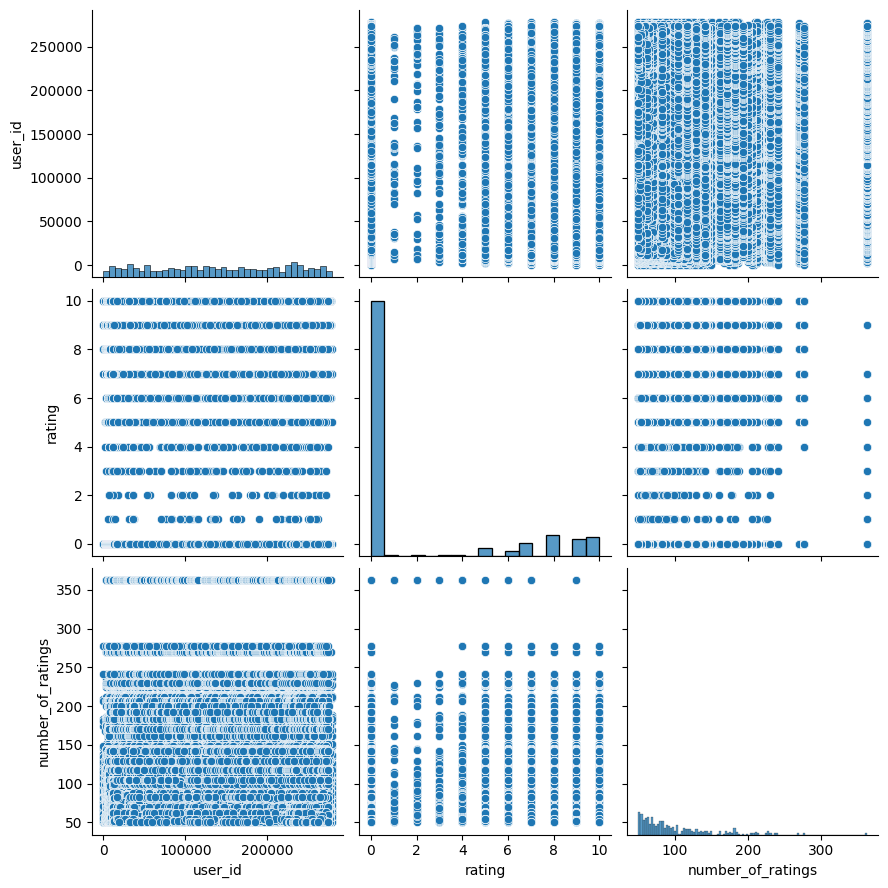

In [9]:
sb.pairplot(final_rating,size=3,height=3)

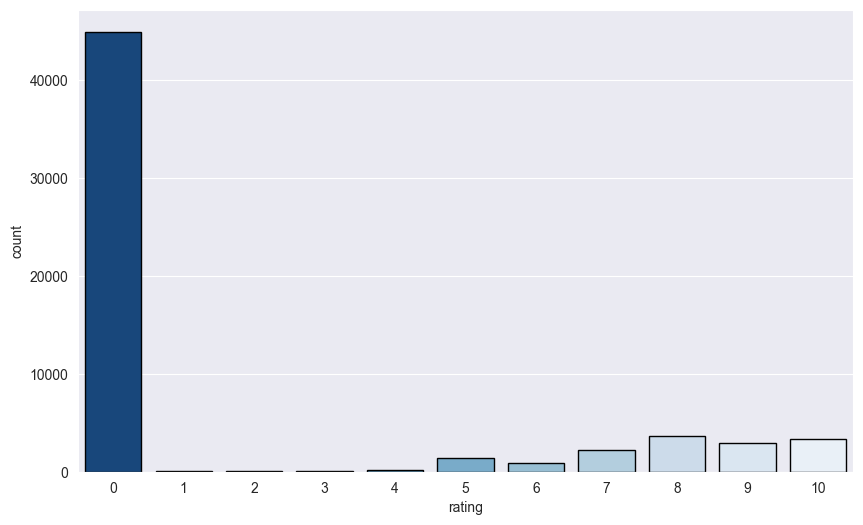

In [10]:

plt.figure(figsize=(10, 6))
sb.set_style('darkgrid')
sb.countplot(x=final_rating['rating'], palette='Blues_r', edgecolor='black')

plt.show()

In [11]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")
book_pivot.fillna(0, inplace=True)

In [66]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


### Current Model

In [67]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [68]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute',metric = 'cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))

In [71]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'Harry Potter and the Sorcerer's Stone (Book 1)'],
      dtype='object', name='title')


In [72]:
query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Range of Motion:

1: The Pull of the Moon, with distance of 0.6260284818073646:
2: Deck the Halls (Holiday Classics), with distance of 0.6924052939467069:
3: STONES FROM THE RIVER, with distance of 0.7219316308601833:
4: Fine Things, with distance of 0.7348614936770338:
5: Vinegar Hill (Oprah's Book Club (Paperback)), with distance of 0.7369014612824035:


In [114]:
query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)
arr = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        arr.append(book_pivot.index[indices.flatten()[i]])
print(arr)

Recommendations for Girl, Interrupted:

1: Bridget Jones: The Edge of Reason, with distance of 0.6771286908895779:
2: The Girls' Guide to Hunting and Fishing, with distance of 0.7598562271812134:
3: Midnight in the Garden of Good and Evil: A Savannah Story, with distance of 0.7611425529405145:
4: The Rapture of Canaan, with distance of 0.7783307377305345:
5: Jemima J: A Novel About Ugly Ducklings and Swans, with distance of 0.7789998011885901:
['Bridget Jones: The Edge of Reason', "The Girls' Guide to Hunting and Fishing", 'Midnight in the Garden of Good and Evil: A Savannah Story', 'The Rapture of Canaan', 'Jemima J: A Novel About Ugly Ducklings and Swans']


In [106]:
query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

arr = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        arr.append(book_pivot.index[i])
print(arr)

Recommendations for N Is for Noose:

1: B Is for Burglar (Kinsey Millhone Mysteries (Paperback)), with distance of 0.6923306991934667:
2: E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback)), with distance of 0.7275454199144875:
3: C Is for Corpse (Kinsey Millhone Mysteries (Paperback)), with distance of 0.7552393045912554:
4: M Is for Malice, with distance of 0.7628569077504609:
5: Southern Cross, with distance of 0.770018079305316:
['1st to Die: A Novel', '2nd Chance', '4 Blondes', '84 Charing Cross Road', 'A Bend in the Road']


In [127]:
query_index

226

In [125]:
book_dict = dict(enumerate(book_pivot.index))
def get_book_index(book_dict, bookname):
    for index, title in book_dict.items():
        if title.upper() == bookname.upper():
            return index
    return None
bookname = "Girl, Interrupted"
book_index = get_book_index(book_dict, bookname)
print(book_index)

226


In [126]:
book_dict

{0: '1984',
 1: '1st to Die: A Novel',
 2: '2nd Chance',
 3: '4 Blondes',
 4: '84 Charing Cross Road',
 5: 'A Bend in the Road',
 6: 'A Case of Need',
 7: 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 8: 'A Civil Action',
 9: 'A Cry In The Night',
 10: 'A Darkness More Than Night',
 11: 'A Day Late and a Dollar Short',
 12: 'A Fine Balance',
 13: 'A Great Deliverance',
 14: 'A Heartbreaking Work of Staggering Genius',
 15: 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 16: 'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
 17: 'A Man Named Dave: A Story of Triumph and Forgiveness',
 18: 'A Man in Full',
 19: 'A Map of the World',
 20: 'A Painted House',
 21: 'A Patchwork Planet',
 22: 'A Prayer for Owen Meany',
 23: 'A Thin Dark Line (Mysteries &amp; Horror)',
 24: "A Thousand Acres (Ballantine Reader's Circle)",
 25: 'A Time to Kill',
 26: "A Virtuous Woman (Oprah's Book Club (Paperback))",
 27: 'A Walk to Remember',
 28: 'A Widow for One Year',


In [75]:
import pickle

In [76]:
pickle.dump(model, open("nnmodel.pkl","wb"))

In [64]:
book_pivot.index[254]

'High Fidelity'

### Cosine Similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity 

In [29]:
similarity_score = cosine_similarity(book_pivot)

In [30]:
similarity_score.shape

(742, 742)

In [31]:
def recommend(book_name):
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))

        data.append(item)
        data.append("With similarity of " + str(i[1]))
        

        
    return data

In [32]:
recommend("Dr. Atkins' New Diet Revolution")


[['The Pull of the Moon', 'Elizabeth Berg'],
 'With similarity of 0.24099688902986394',
 ['Dragonfly in Amber', 'DIANA GABALDON'],
 'With similarity of 0.21132418528339855',
 ["Daddy's Little Girl", 'Mary Higgins Clark'],
 'With similarity of 0.20750919442510268',
 ['Turtle Moon', 'Alice Hoffman'],
 'With similarity of 0.20056667152003999',
 ['Family Album', 'Danielle Steel'],
 'With similarity of 0.19002136329138922']

In [33]:
recommend("F Is for Fugitive (Kinsey Millhone Mysteries (Paperback))")


[['G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback))', 'Sue Grafton'],
 'With similarity of 0.5515366308337869',
 ['I Is for Innocent', 'Sue Grafton'],
 'With similarity of 0.5086741795551688',
 ['E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton'],
 'With similarity of 0.4844222424001063',
 ['B Is for Burglar (Kinsey Millhone Mysteries (Paperback))', 'Sue Grafton'],
 'With similarity of 0.4831935713534072',
 ['H Is for Homicide (Kinsey Millhone Mysteries (Paperback))', 'Sue Grafton'],
 'With similarity of 0.45441382603813635']

In [34]:
sorted(list(enumerate(similarity_score[0])),key= lambda x: x[1], reverse = True)[1:6]

[(54, 0.2634762509240882),
 (575, 0.24641805467078148),
 (526, 0.22171768558037394),
 (321, 0.21653714990315054),
 (668, 0.21514873163409381)]